<a href="https://colab.research.google.com/github/yamato7503/DeepLerarning/blob/master/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

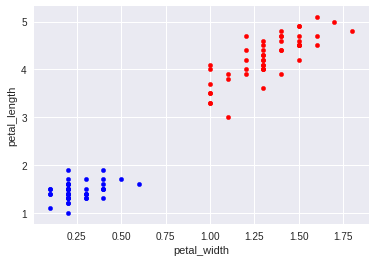

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import pandas as pd
import seaborn as sns

from sklearn import datasets

iris = sns.load_dataset('iris')

data = iris[:100]
columns = ['petal_width', 'petal_length']
x = data[columns]
y = data['species']

y = (y == 'setosa').astype(int)

def plot_iris(x, y, colors, ax=None):
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
    
    plt.figure()
    x1 = x.columns[0]
    x2 = x.columns[1]
  
    for (species, group), c in zip(x.groupby(y), colors):
        group.plot(kind='scatter', x=x1, y=x2, color=c, ax=ax)
  
    return ax
    
plot_iris(x, y, colors=['red', 'blue'])
plt.show()

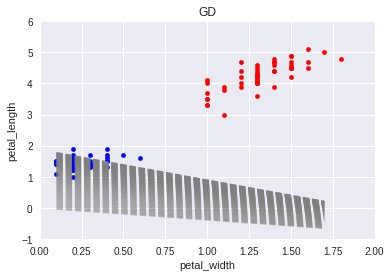

petal_width    -0.398887
petal_length   -0.406609
dtype: float64


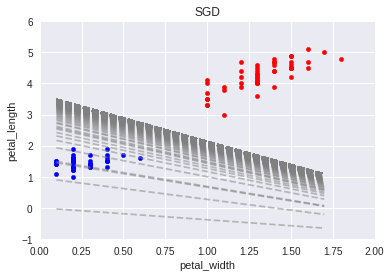

petal_width    -5.697403
petal_length   -3.852318
dtype: float64


In [0]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def calc_y(x, w, b):
    return sigmoid(np.dot(x, w) + b)

def calc_grad(x, y, w, b):
    error = y - calc_y(x, w, b)
    w_grad = -np.mean(x.T * error, axis=1)
    b_grad = -np.mean(error)
    return w_grad, b_grad
  
nb_epochs = 50
def GradientDescent(x, y, w, b, eta=0.1):
    for i in range(1, nb_epochs):
        w_grad, b_grad = calc_grad(x, y, w, b)
        w = w - eta * w_grad
        b = b - eta * b_grad
        e = np.mean(np.abs(y - calc_y(x, w, b)))
        yield i, w, b, e
        
def SGD(x, y, w, b, eta=1.0):
    for i in range(1, nb_epochs):
        indexer = np.arange(x.shape[0]) # x.shape[0] ← データ件数
        np.random.shuffle(indexer)
        for index in indexer:
            _x = x.iloc[[index], ] # index番目のデータをとってくる
            _y = y.iloc[[index], ]
            w_grad, b_grad = calc_grad(x, y, w, b)   
            w = w - eta * w_grad
            b = b - eta * b_grad
            e = np.mean(np.abs(y - calc_y(x, w, b)))
            yield i, w, b, e


def plot_result(x, y, solver, title):
    fig = plt.figure()
  
    ax = fig.add_subplot(1, 1, 1)
    plt.xlim([0.0, 2.0])
    plt.ylim([-1.0, 6.0])
  
    art_objs = []
  
    bx = np.arange(x.iloc[:, 0].min(), x.iloc[:, 0].max(), 0.1)
  
    w, b = np.zeros(2), 0
    gen = solver(x, y, w, b)
  
    for i, w, b, e in gen:
        by = -b / w[1] - w[0] / w[1] * bx
    
        l = ax.plot(bx, by, color='gray', linestyle='dashed', alpha=(i/nb_epochs)/2.+0.5)
    
        art_objs.append(l)
  
    ax = plot_iris(x, y, colors=['red', 'blue'], ax=ax)
    ax.set_title(title)
    plt.show()
  
    print(w)
    
plot_result(x, y, GradientDescent, title='GD')
plot_result(x, y, SGD, title='SGD')